# Анализ главных компонент (PCA)

**Анализ главных компонент (PCA)** - это метод снижения размерности данных, который используется для выделения наиболее важных признаков в наборе данных. Основная идея состоит в том, чтобы преобразовать исходные признаки в новый набор признаков (главные компоненты), таким образом, чтобы сохранить максимальное количество информации.

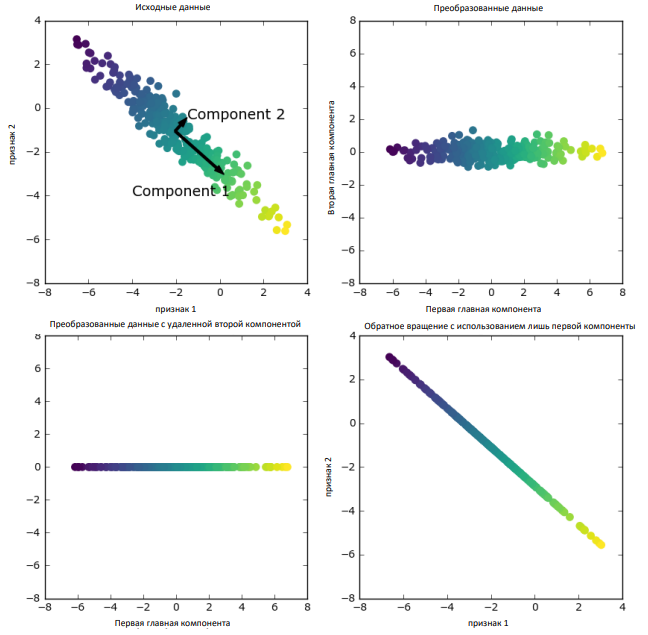

Процесс работы PCA можно представить в несколько шагов:

- Центрирование данных: Вычитаем среднее значение каждого признака из всех его значений, чтобы центрировать данные вокруг нуля.

- Вычисление ковариационной матрицы: Определяем, насколько два признака изменяются вместе. Ковариационная матрица содержит все такие информации для всех пар признаков.

- Вычисление собственных значений и собственных векторов: Собственные значения и собственные векторы ковариационной матрицы определяют направления максимальной изменчивости в данных.

- Выбор главных компонент: Главные компоненты - это собственные векторы, соответствующие наибольшим собственным значениям. Они представляют собой новые направления в пространстве признаков.

- Преобразование данных: Проектируем исходные данные на новые оси, образованные главными компонентами.`

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
canser_info = load_breast_cancer()
data_canser = pd.DataFrame(canser_info.data, columns=canser_info.feature_names)
target_canser = pd.DataFrame(canser_info.target)

In [3]:
data_canser

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Часто используется стандартизация (или нормализация) данных перед PCA, что означает приведение каждого признака к нулевому среднему и единичному стандартному отклонению. Это гарантирует, что все признаки имеют одинаковый масштаб, и PCA может эффективно выявлять направления максимальной изменчивости в данных.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_canser_scaled = pd.DataFrame(scaler.fit_transform(data_canser), columns=canser_info.feature_names)
data_canser_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


Обучение PCA и его применение так же просто, как применение
преобразований, выполняющихся в ходе предварительной обработки. 
Мы создаем экземпляр объекта PCA, находим главные компоненты,
вызвав метод fit, а затем применяем вращение и снижение размерности, 
вызвав метод transform. По умолчанию PCA лишь поворачивает (и 
смещает) данные, но сохраняет все главные компоненты. Чтобы 
уменьшить размерность данных, нам нужно указать, сколько компонент 
мы хотим сохранить при создании объекта PCA.

In [6]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
data_canser_pca = pd.DataFrame(pca.fit_transform(data_canser_scaled))
data_canser_pca

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


### Одним из основных применений PCA является визуализация высокоразмерных наборов данных.

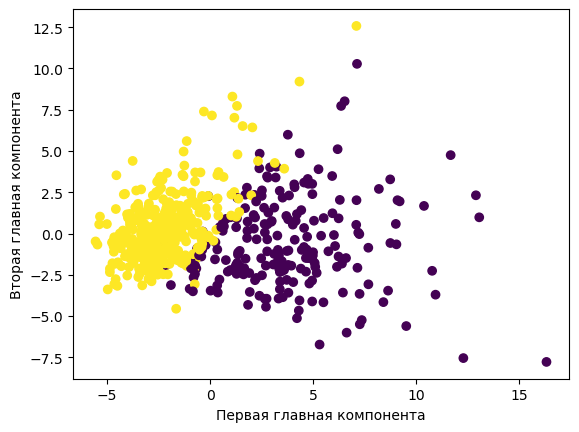

In [10]:
# Построение scatter plot для двух главных компонент 
import matplotlib.pyplot as plt
scatter_plot = plt.scatter(data_canser_pca[0], data_canser_pca[1], c=target_canser)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')

plt.show()

In [11]:
print(f"форма главных компонент: {format(pca.components_.shape)}")
print(pca.components_[0])

форма главных компонент: (2, 30)
[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]


Обе компоненты
включают все 30 признаков. Смешивание всех признаков – это как раз 
то, что усложняет интерпретацию осей

### Еще одно применение PCA – это выделение признаков.
Идея, лежащая в основе выделения признаков, 
заключается в поиске нового представления данных, которое в отличие 
от исходного лучше подходит для анализа. Отличный пример,
показывающий, что выделение признаков может быть полезно, – это 
работа с изображениями. Изображения состоят из пикселей, обычно 
хранящихся в виде интенсивностей красной, зеленой и синей 
составляющих цвета (RGB). Объекты в изображениях, как правило, 
состоят из тысяч пикселей и лишь все вместе эти пиксели приобретают 
смысл.

Чтобы данные стали менее асимметричными, мы будем рассматривать 
не более 50 изображений каждого человека (в противном случае
выделение признаков будет перегружено большим количеством 
изображений Джорджа Буша)

In [12]:
from sklearn.datasets import fetch_lfw_people
people_img = fetch_lfw_people(min_faces_per_person=10, resize=1)

In [13]:
people_img.target_names.shape

(158,)

In [14]:
mask = np.zeros(people_img.target.shape, dtype=np.bool)
for target in np.unique(people_img.target):
    mask[np.where(people_img.target == target)[0][:50]] = 1
X_people = people_img.data[mask]
y_people = people_img.target[mask]
# для получения большей стабильности масштабируем шкалу оттенков серого так, чтобы значения 
# были в диапазоне от 0 до 1 вместо использования шкалы значений от 0 до 255 
X_people = X_people / 255.


C:\Users\dermi\AppData\Local\Temp\ipykernel_23284\3996505251.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people_img.target.shape, dtype=np.bool)


In [15]:
y_people.shape

(3364,)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# разбиваем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# строим KNeighborsClassifier с одним соседом
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Правильность на тестовом наборе для 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе для 1-nn: 0.20


C:\Users\dermi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


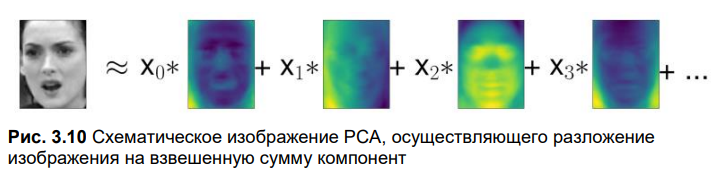

In [18]:
pca = PCA(n_components=80, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
 
print("обучающие данные после PCA: {}".format(X_train_pca.shape))


обучающие данные после PCA: (2523, 80)


In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test_pca, y_test)))


Правильность на тестовом наборе: 0.25


C:\Users\dermi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


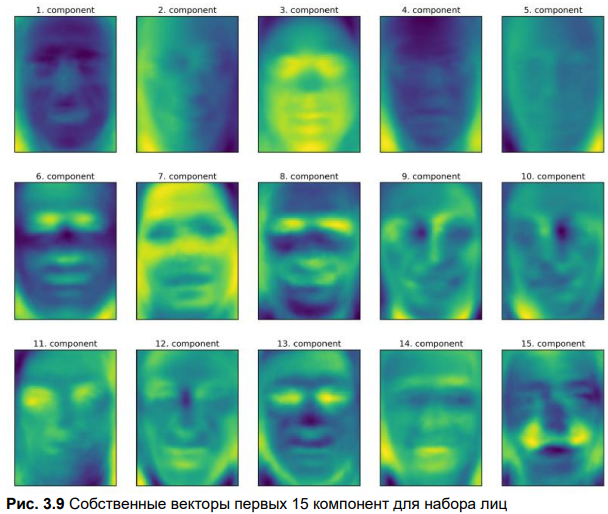